In [1]:
import pandas as pd

In [3]:
DATA_PATH_BASE_VM = '/home/guadalupealesandro/buckets/b1/datasets/competencia_02_crudo.csv.gz'

In [4]:
df = pd.read_csv(DATA_PATH_BASE_VM)

In [6]:
# Cantidad de NAs por columna y período
na_por_periodo = df.groupby('foto_mes').apply(lambda x: x.isna().sum())
print(na_por_periodo)

          numero_de_cliente  foto_mes  active_quarter  cliente_vip  internet  \
foto_mes                                                                       
201901                    0         0               0            0         0   
201902                    0         0               0            0         0   
201903                    0         0               0            0         0   
201904                    0         0               0            0         0   
201905                    0         0               0            0         0   
201906                    0         0               0            0         0   
201907                    0         0               0            0         0   
201908                    0         0               0            0         0   
201909                    0         0               0            0         0   
201910                    0         0               0            0         0   
201911                    0         0   

/tmp/ipykernel_5165/1053426522.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  na_por_periodo = df.groupby('foto_mes').apply(lambda x: x.isna().sum())


In [7]:
# Cantidad de ceros por columna y período
zeros_por_periodo = df.groupby('foto_mes').apply(lambda x: (x == 0).sum())
print(zeros_por_periodo)

          numero_de_cliente  foto_mes  active_quarter  cliente_vip  internet  \
foto_mes                                                                       
201901                    0         0            1542       123408     12759   
201902                    0         0            1514       124535     13320   
201903                    0         0            1511       125100     12907   
201904                    0         0            1602       125668     13012   
201905                    0         0            1606       126329     12310   
201906                    0         0            1659       127854     12737   
201907                    0         0            1654       129370     12571   
201908                    0         0            1743       131233     12587   
201909                    0         0            1722       132840     12696   
201910                    0         0            1769       135090     12586   
201911                    0         0   

/tmp/ipykernel_5165/3109746406.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  zeros_por_periodo = df.groupby('foto_mes').apply(lambda x: (x == 0).sum())


Matplotlib is building the font cache; this may take a moment.


Total de variables numéricas: 152
Periodos: [np.int64(201901), np.int64(201902), np.int64(201903), np.int64(201904), np.int64(201905), np.int64(201906), np.int64(201907), np.int64(201908), np.int64(201909), np.int64(201910), np.int64(201911), np.int64(201912), np.int64(202001), np.int64(202002), np.int64(202003), np.int64(202004), np.int64(202005), np.int64(202006), np.int64(202007), np.int64(202008), np.int64(202009), np.int64(202010), np.int64(202011), np.int64(202012), np.int64(202101), np.int64(202102), np.int64(202103), np.int64(202104), np.int64(202105), np.int64(202106), np.int64(202107), np.int64(202108)]

Generando 10 páginas de gráficos...
  ✅ Página 1 guardada
  ✅ Página 2 guardada
  ✅ Página 3 guardada
  ✅ Página 4 guardada
  ✅ Página 5 guardada
  ✅ Página 6 guardada
  ✅ Página 7 guardada
  ✅ Página 8 guardada
  ✅ Página 9 guardada
  ✅ Página 10 guardada

🎉 Completado! 10 archivos PNG generados.

ANÁLISIS DE CAMBIOS ENTRE PRIMER Y ÚLTIMO PERIODO

🔴 TOP 10 VARIABLES CON MAYO

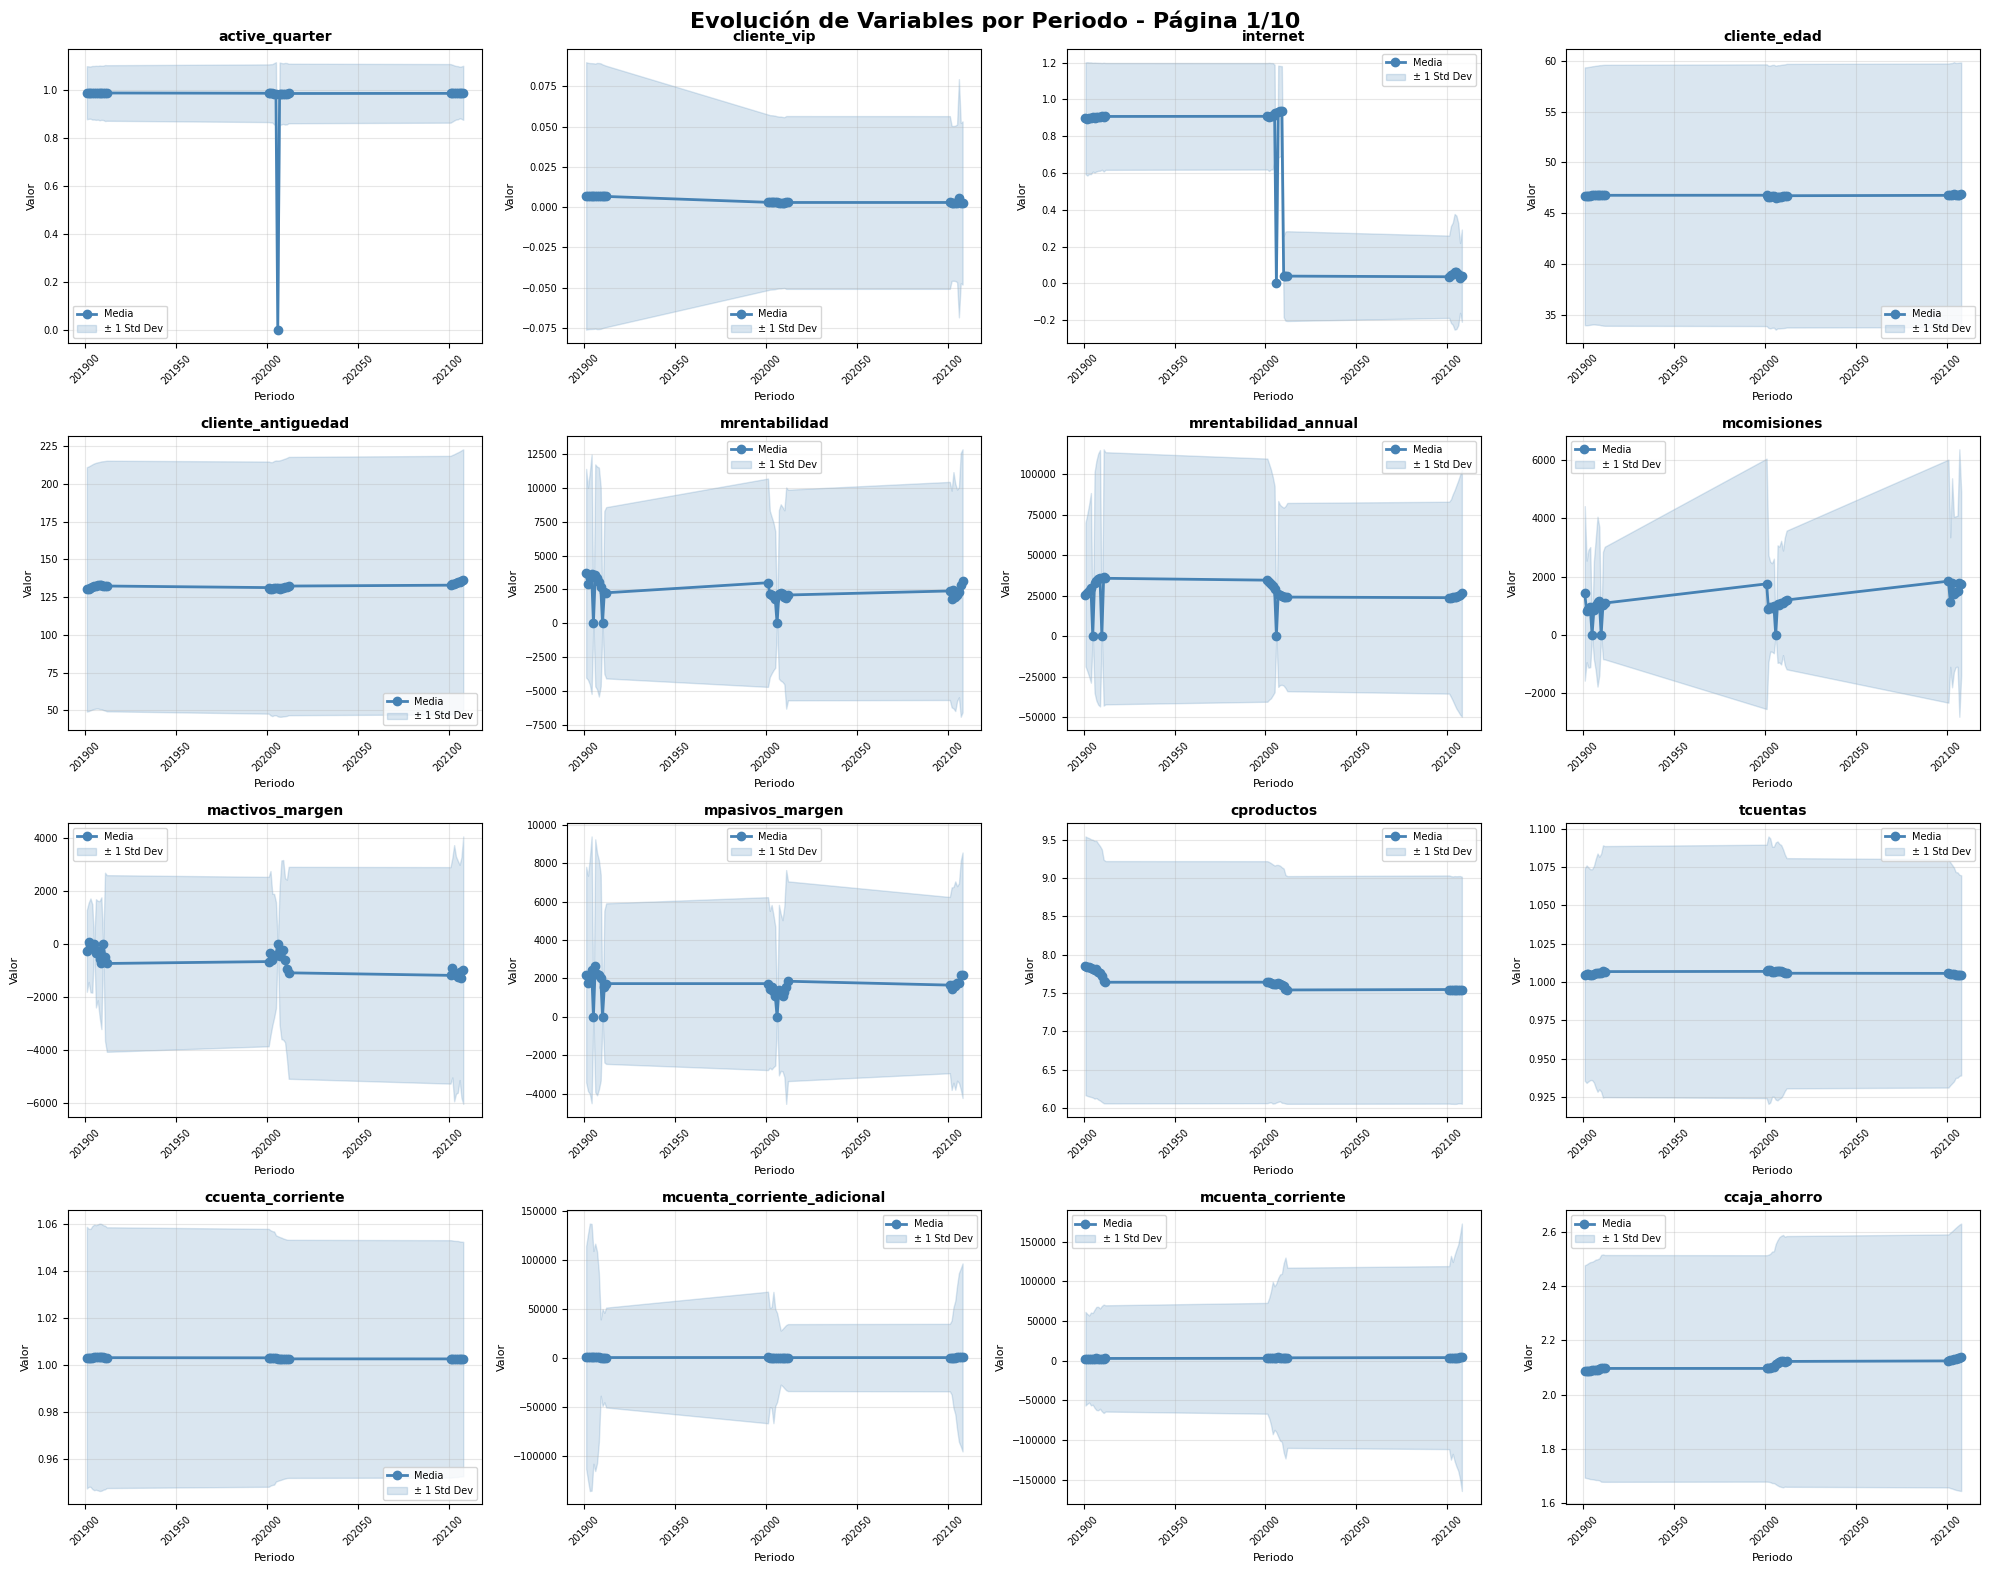

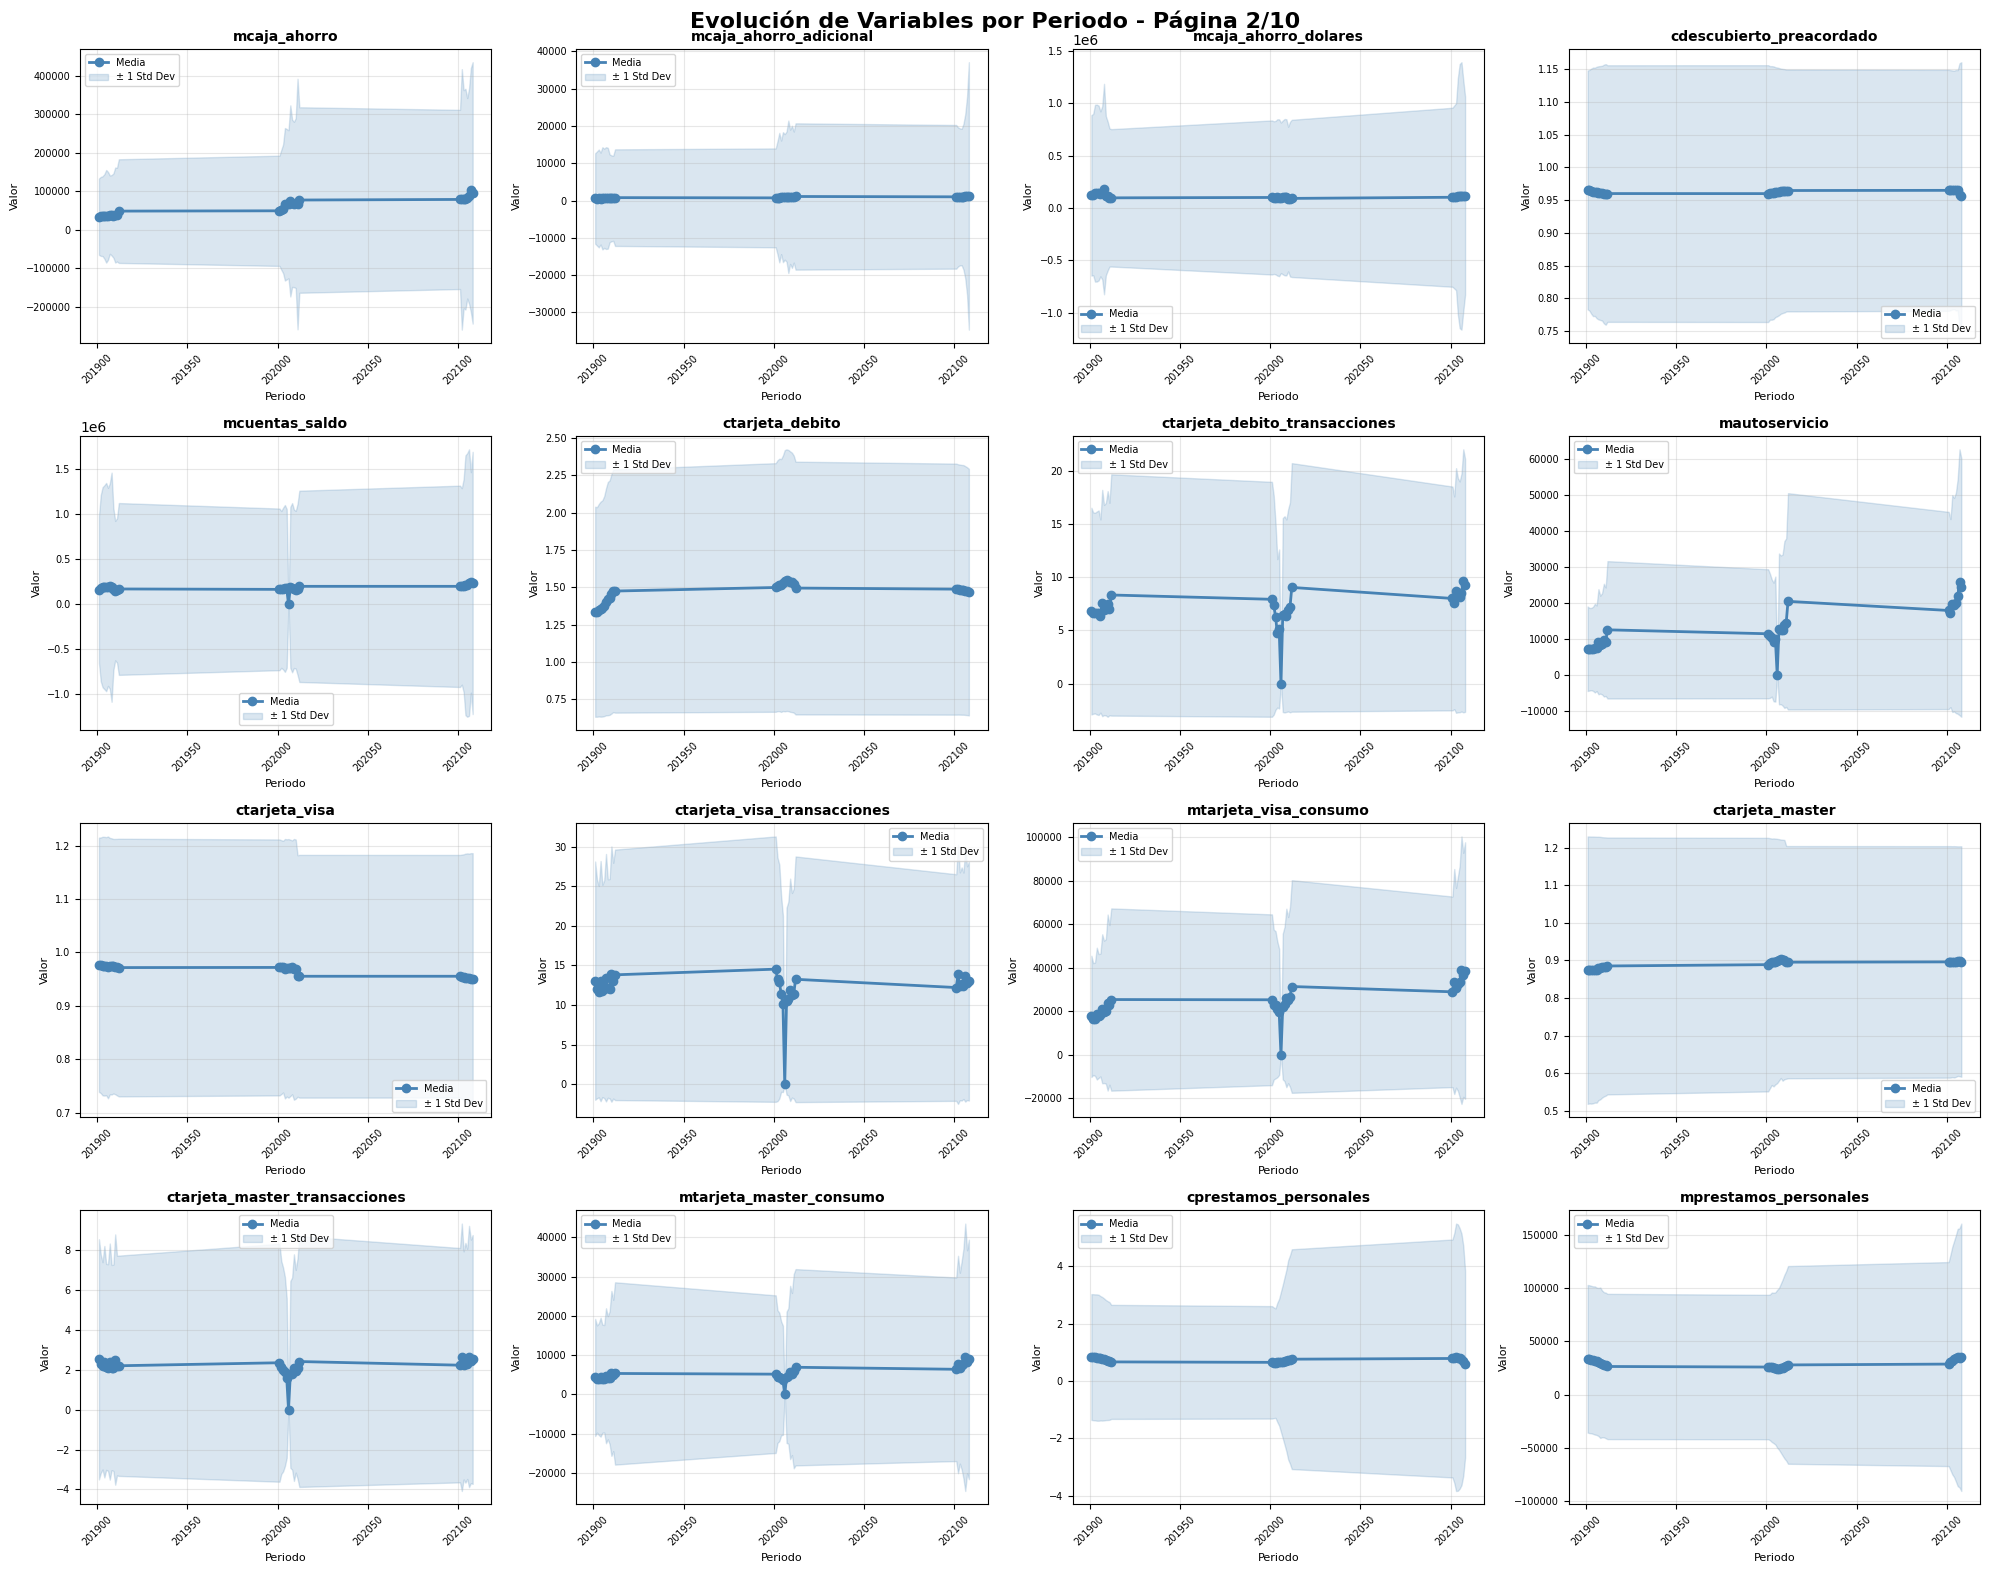

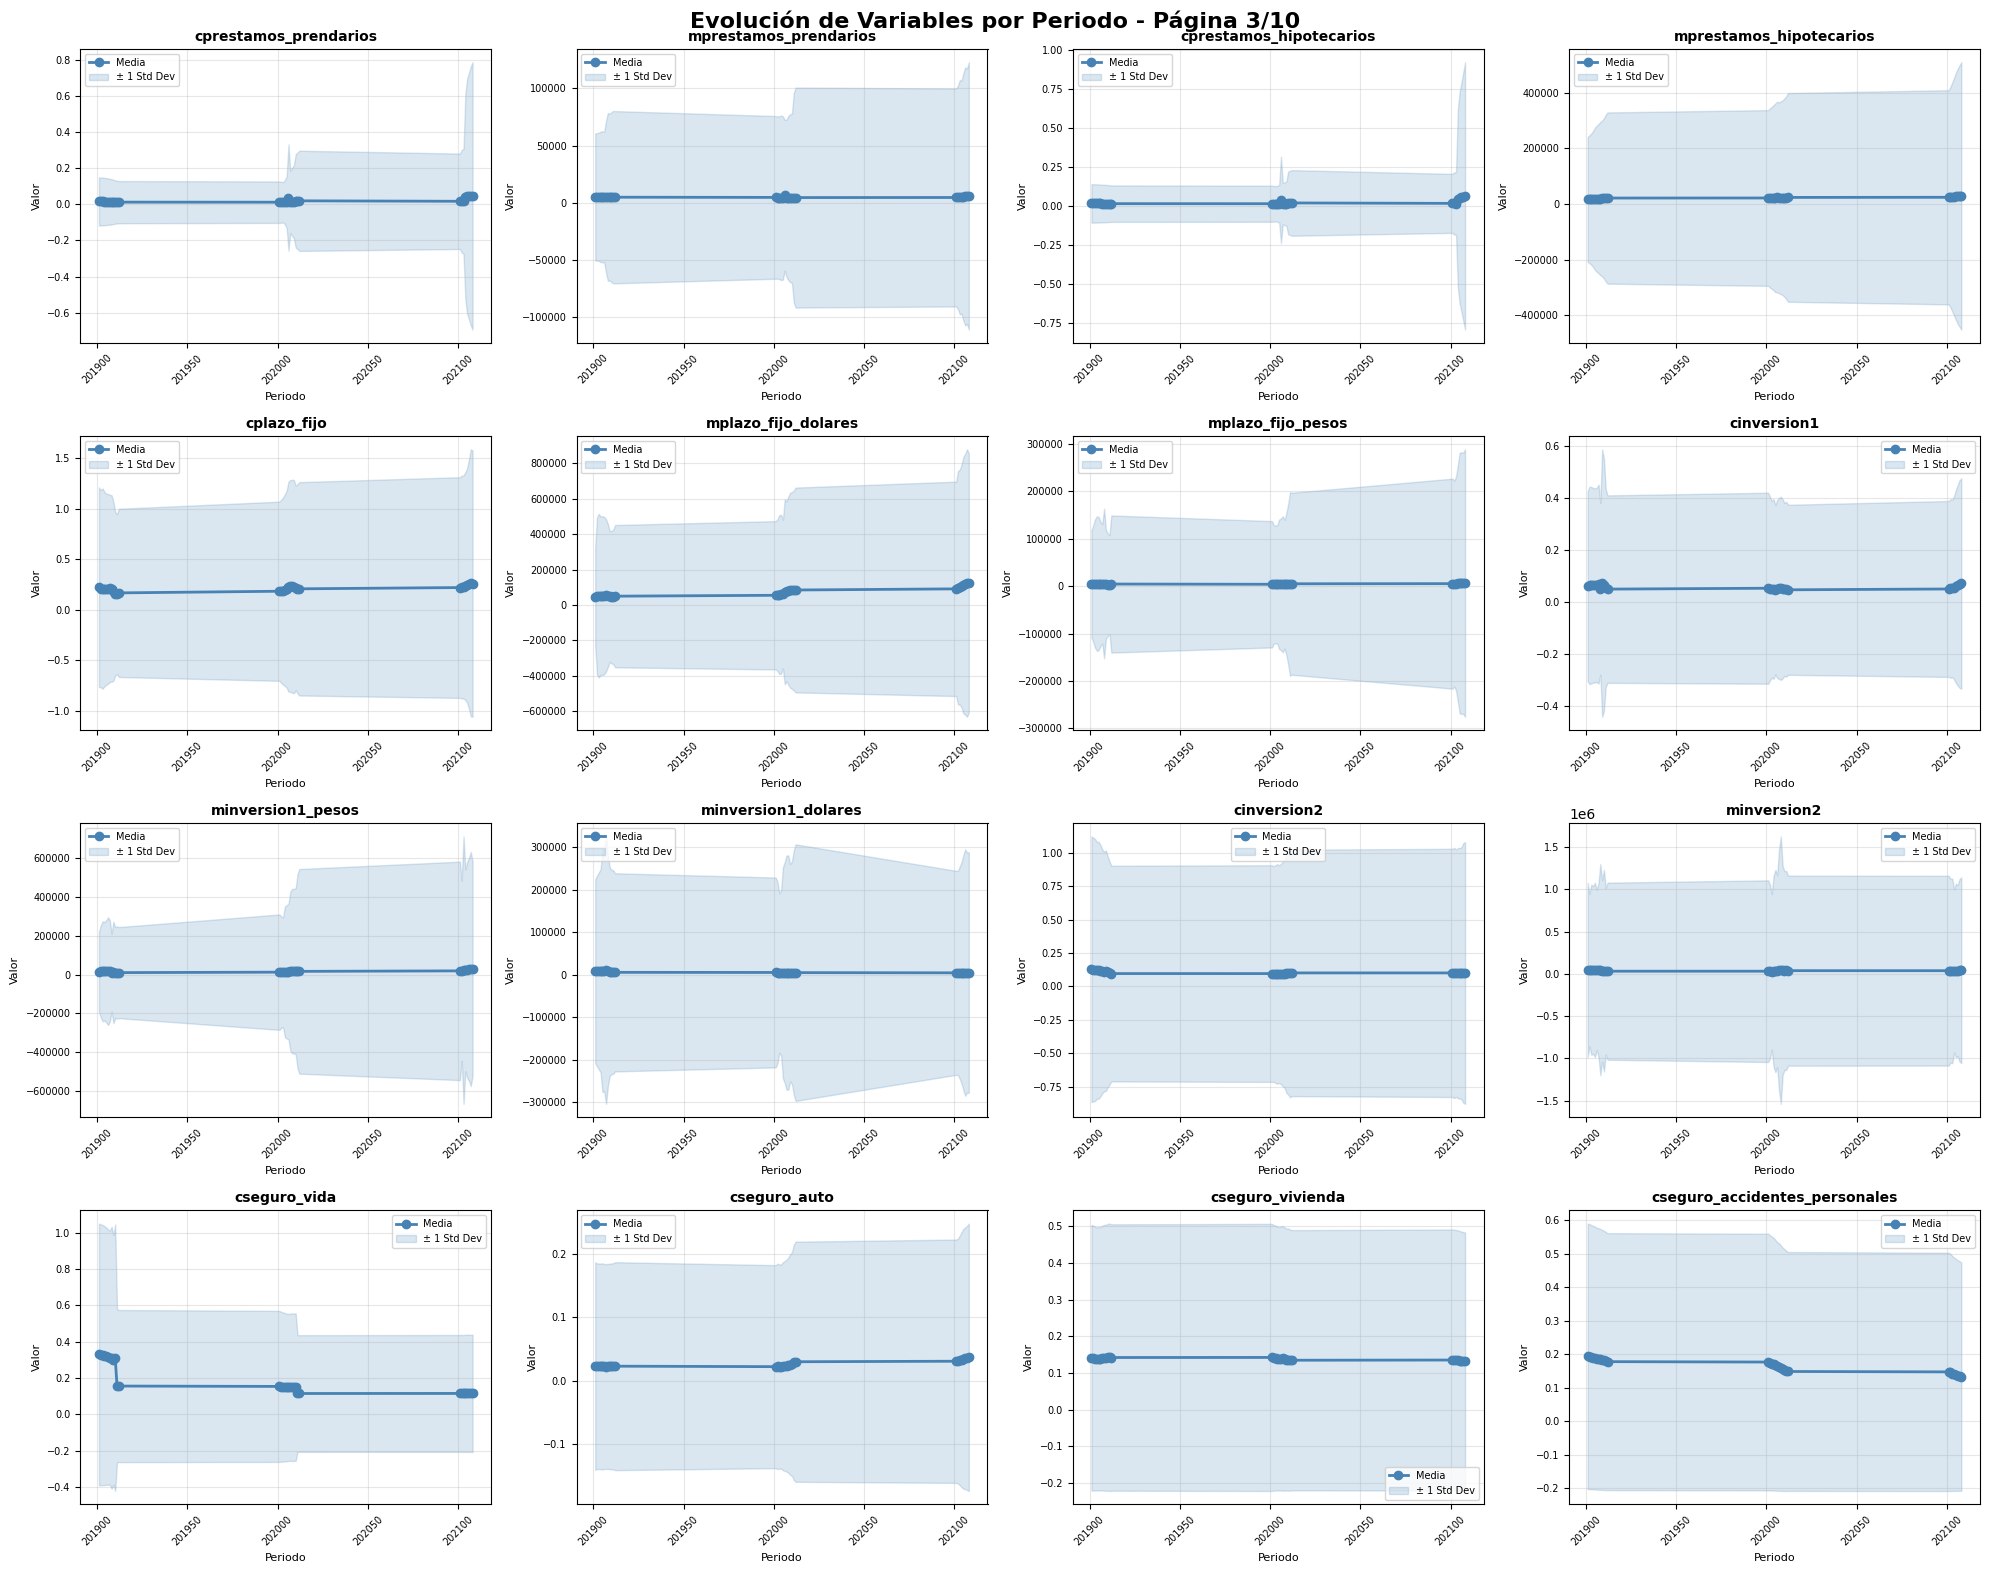

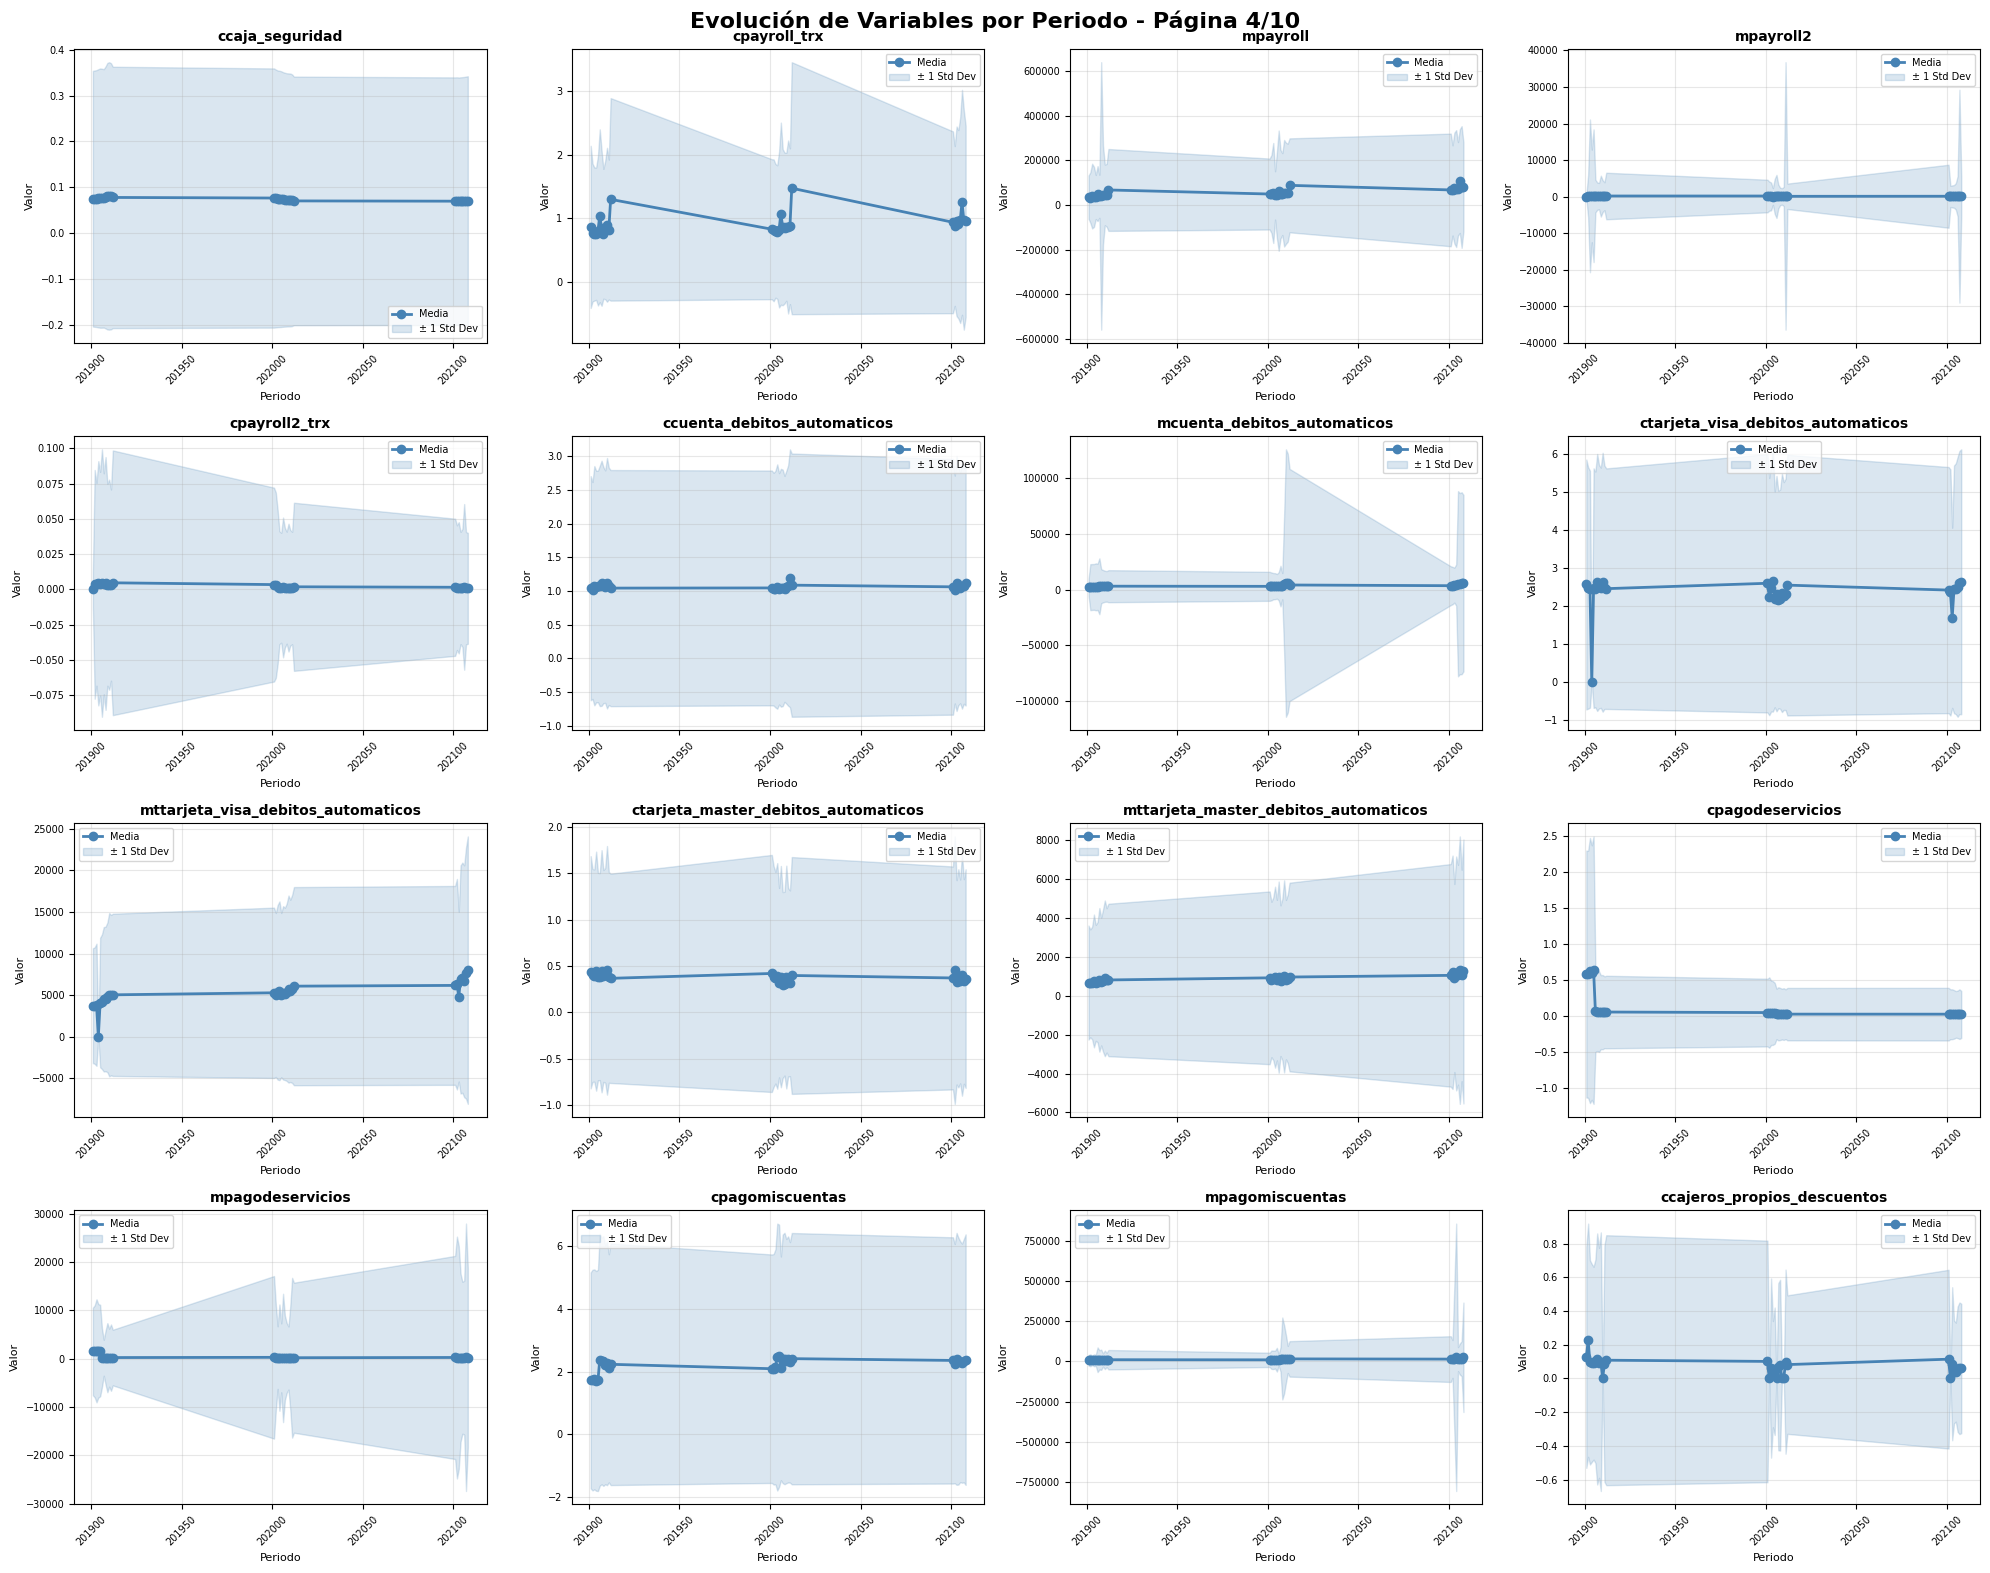

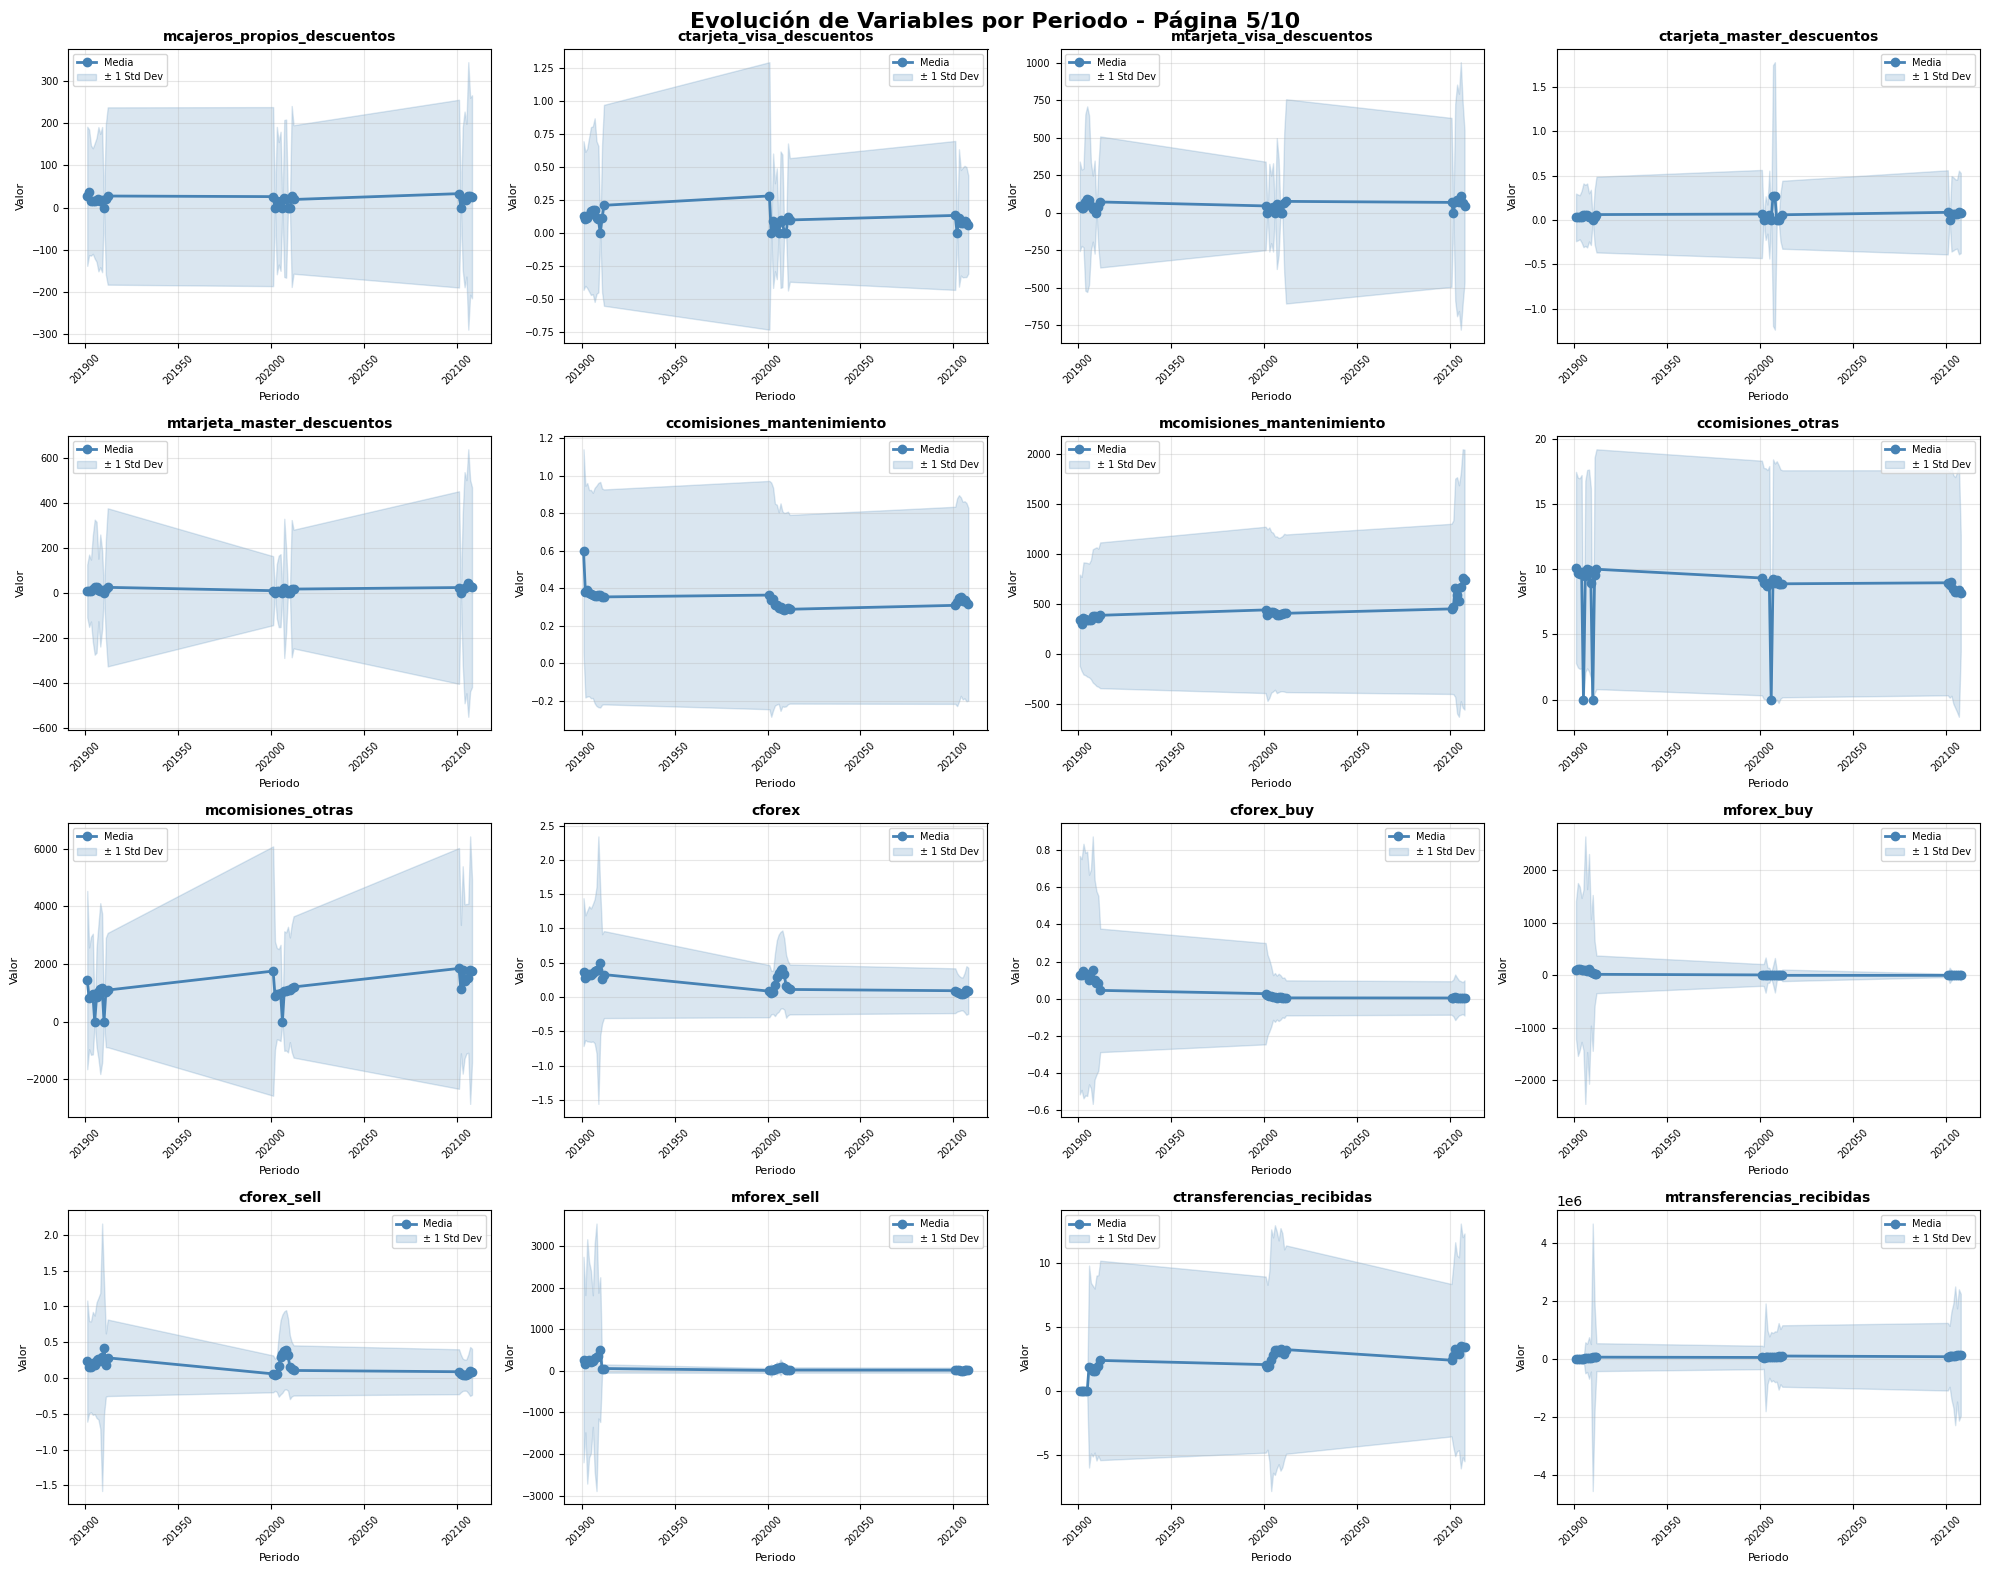

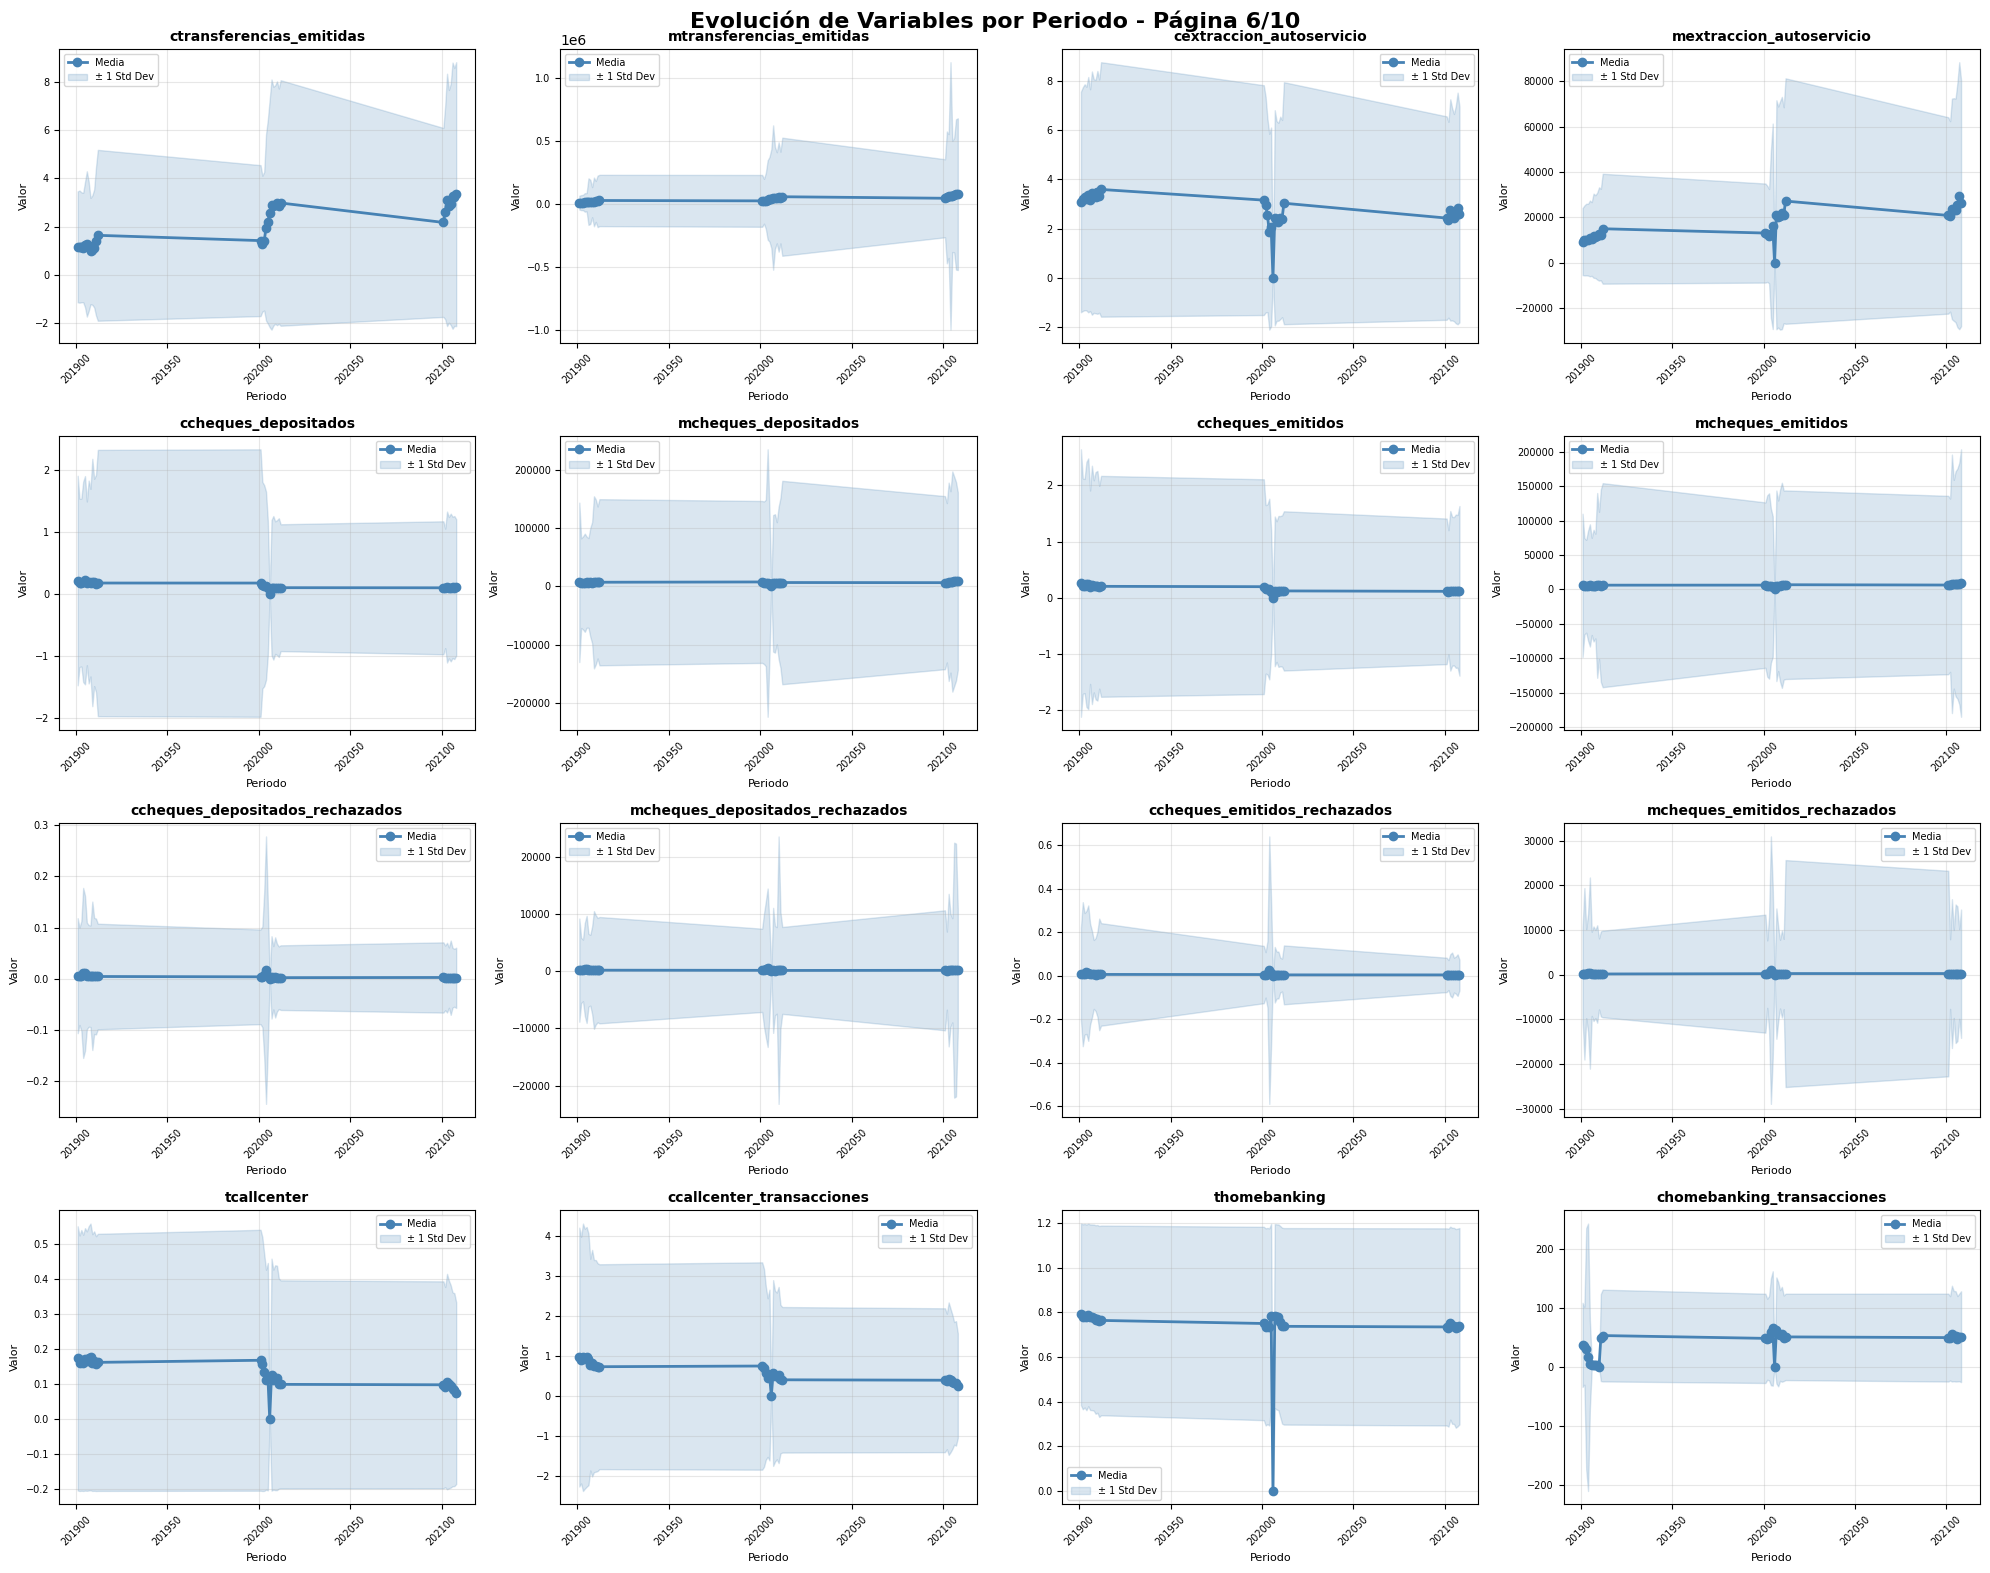

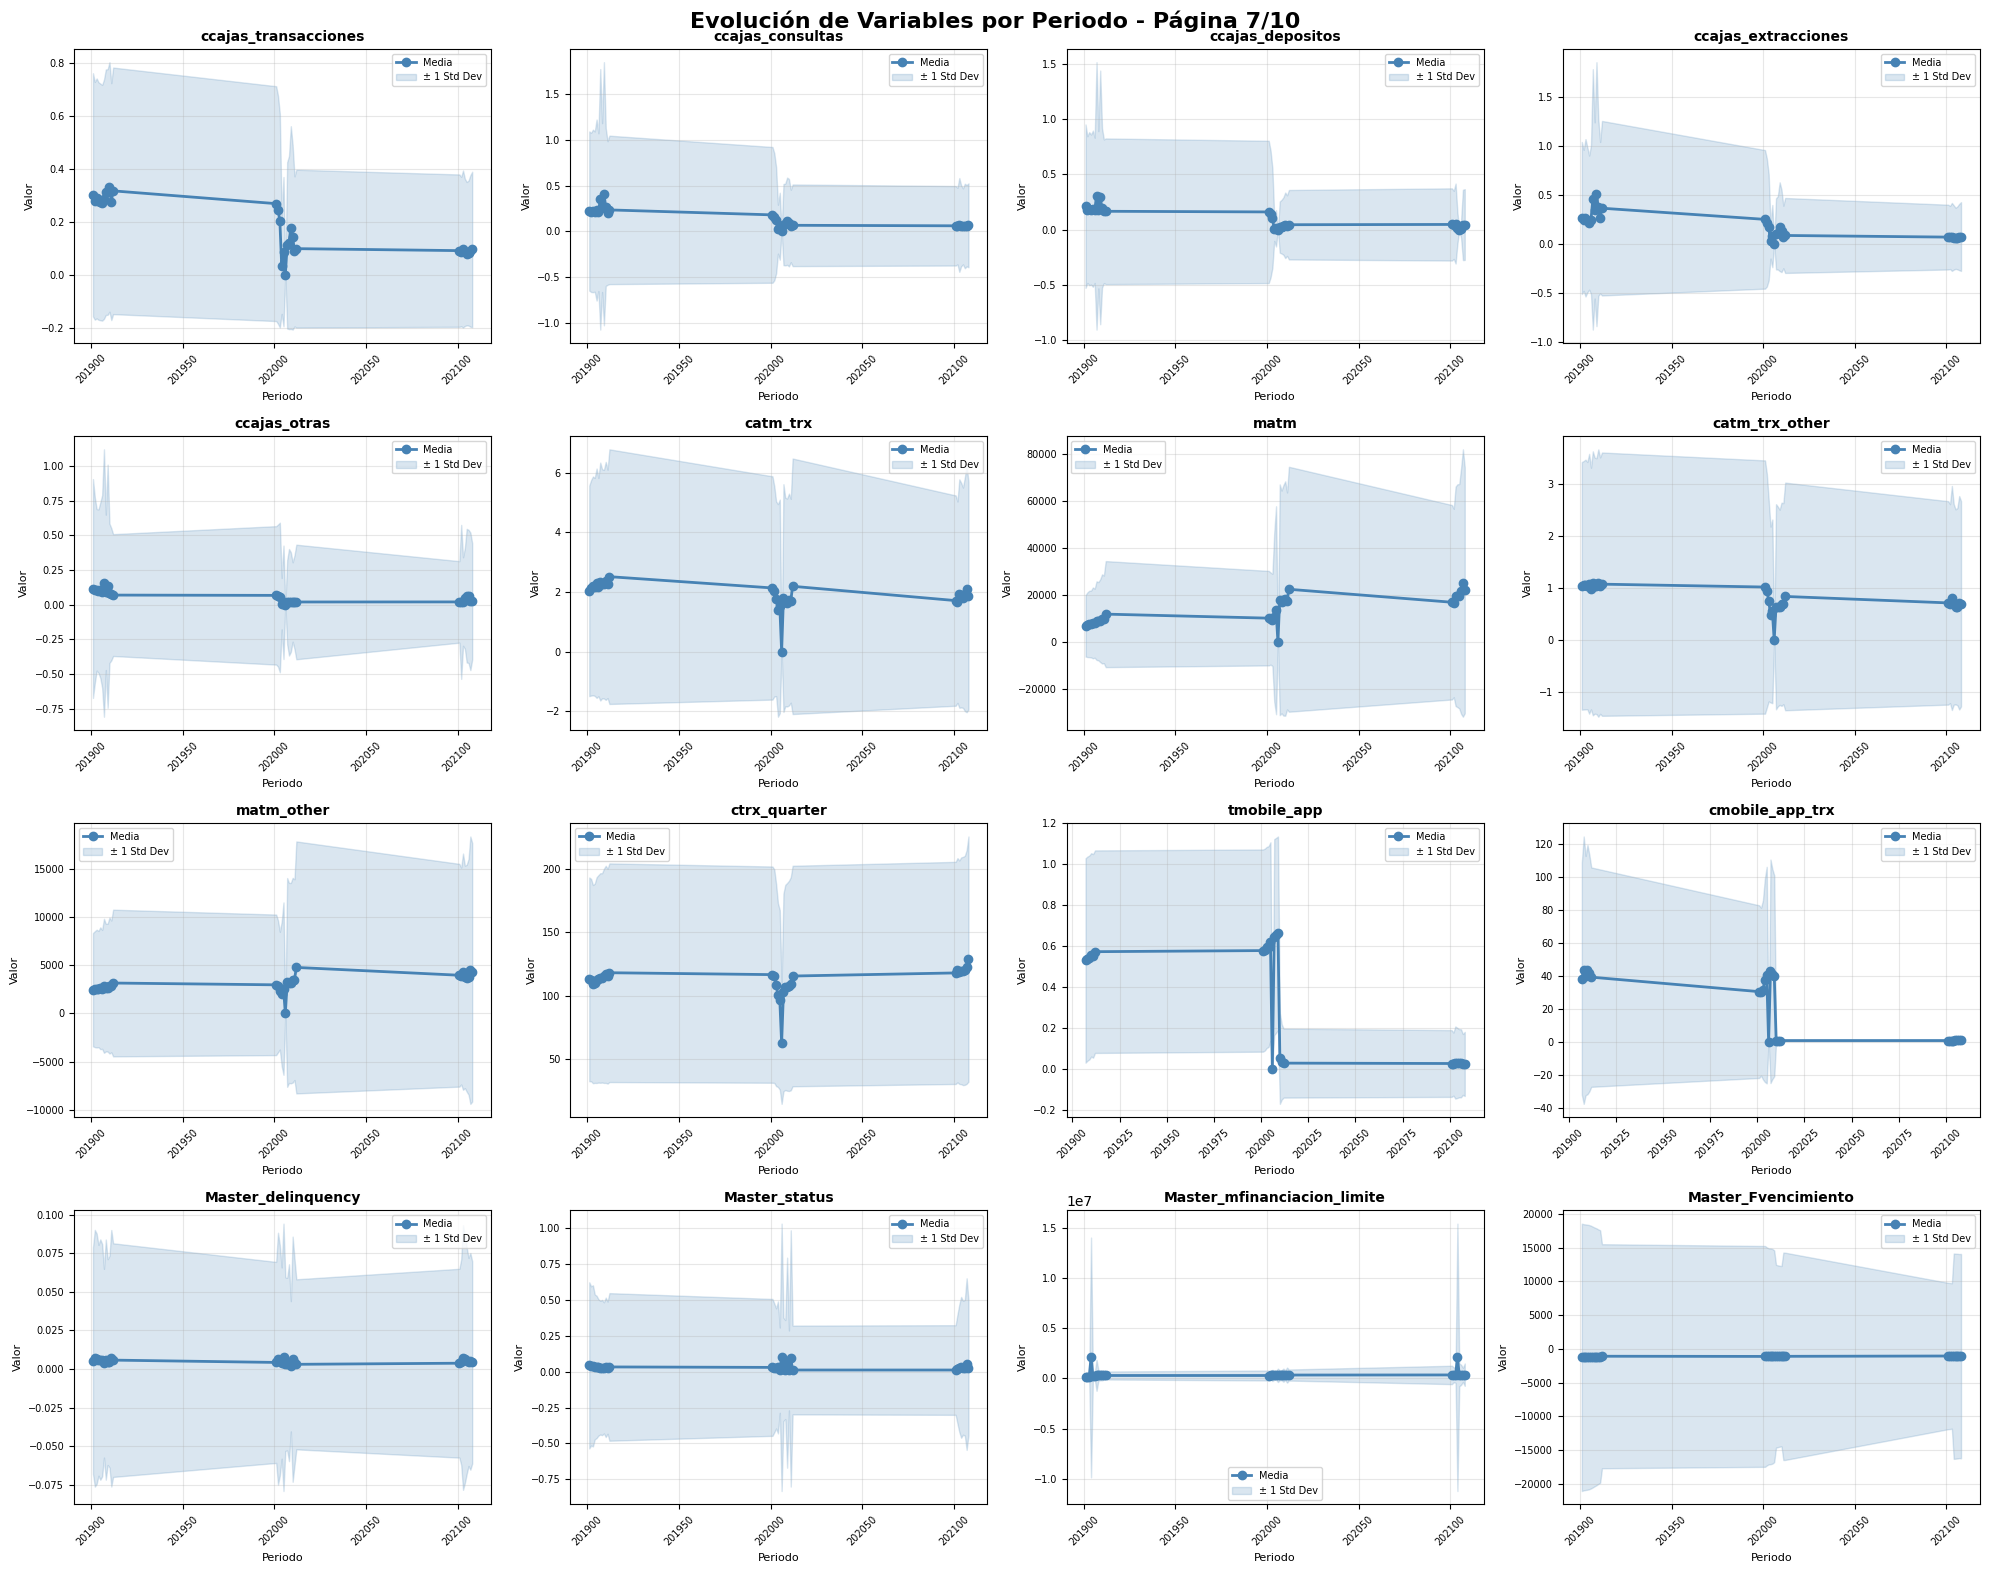

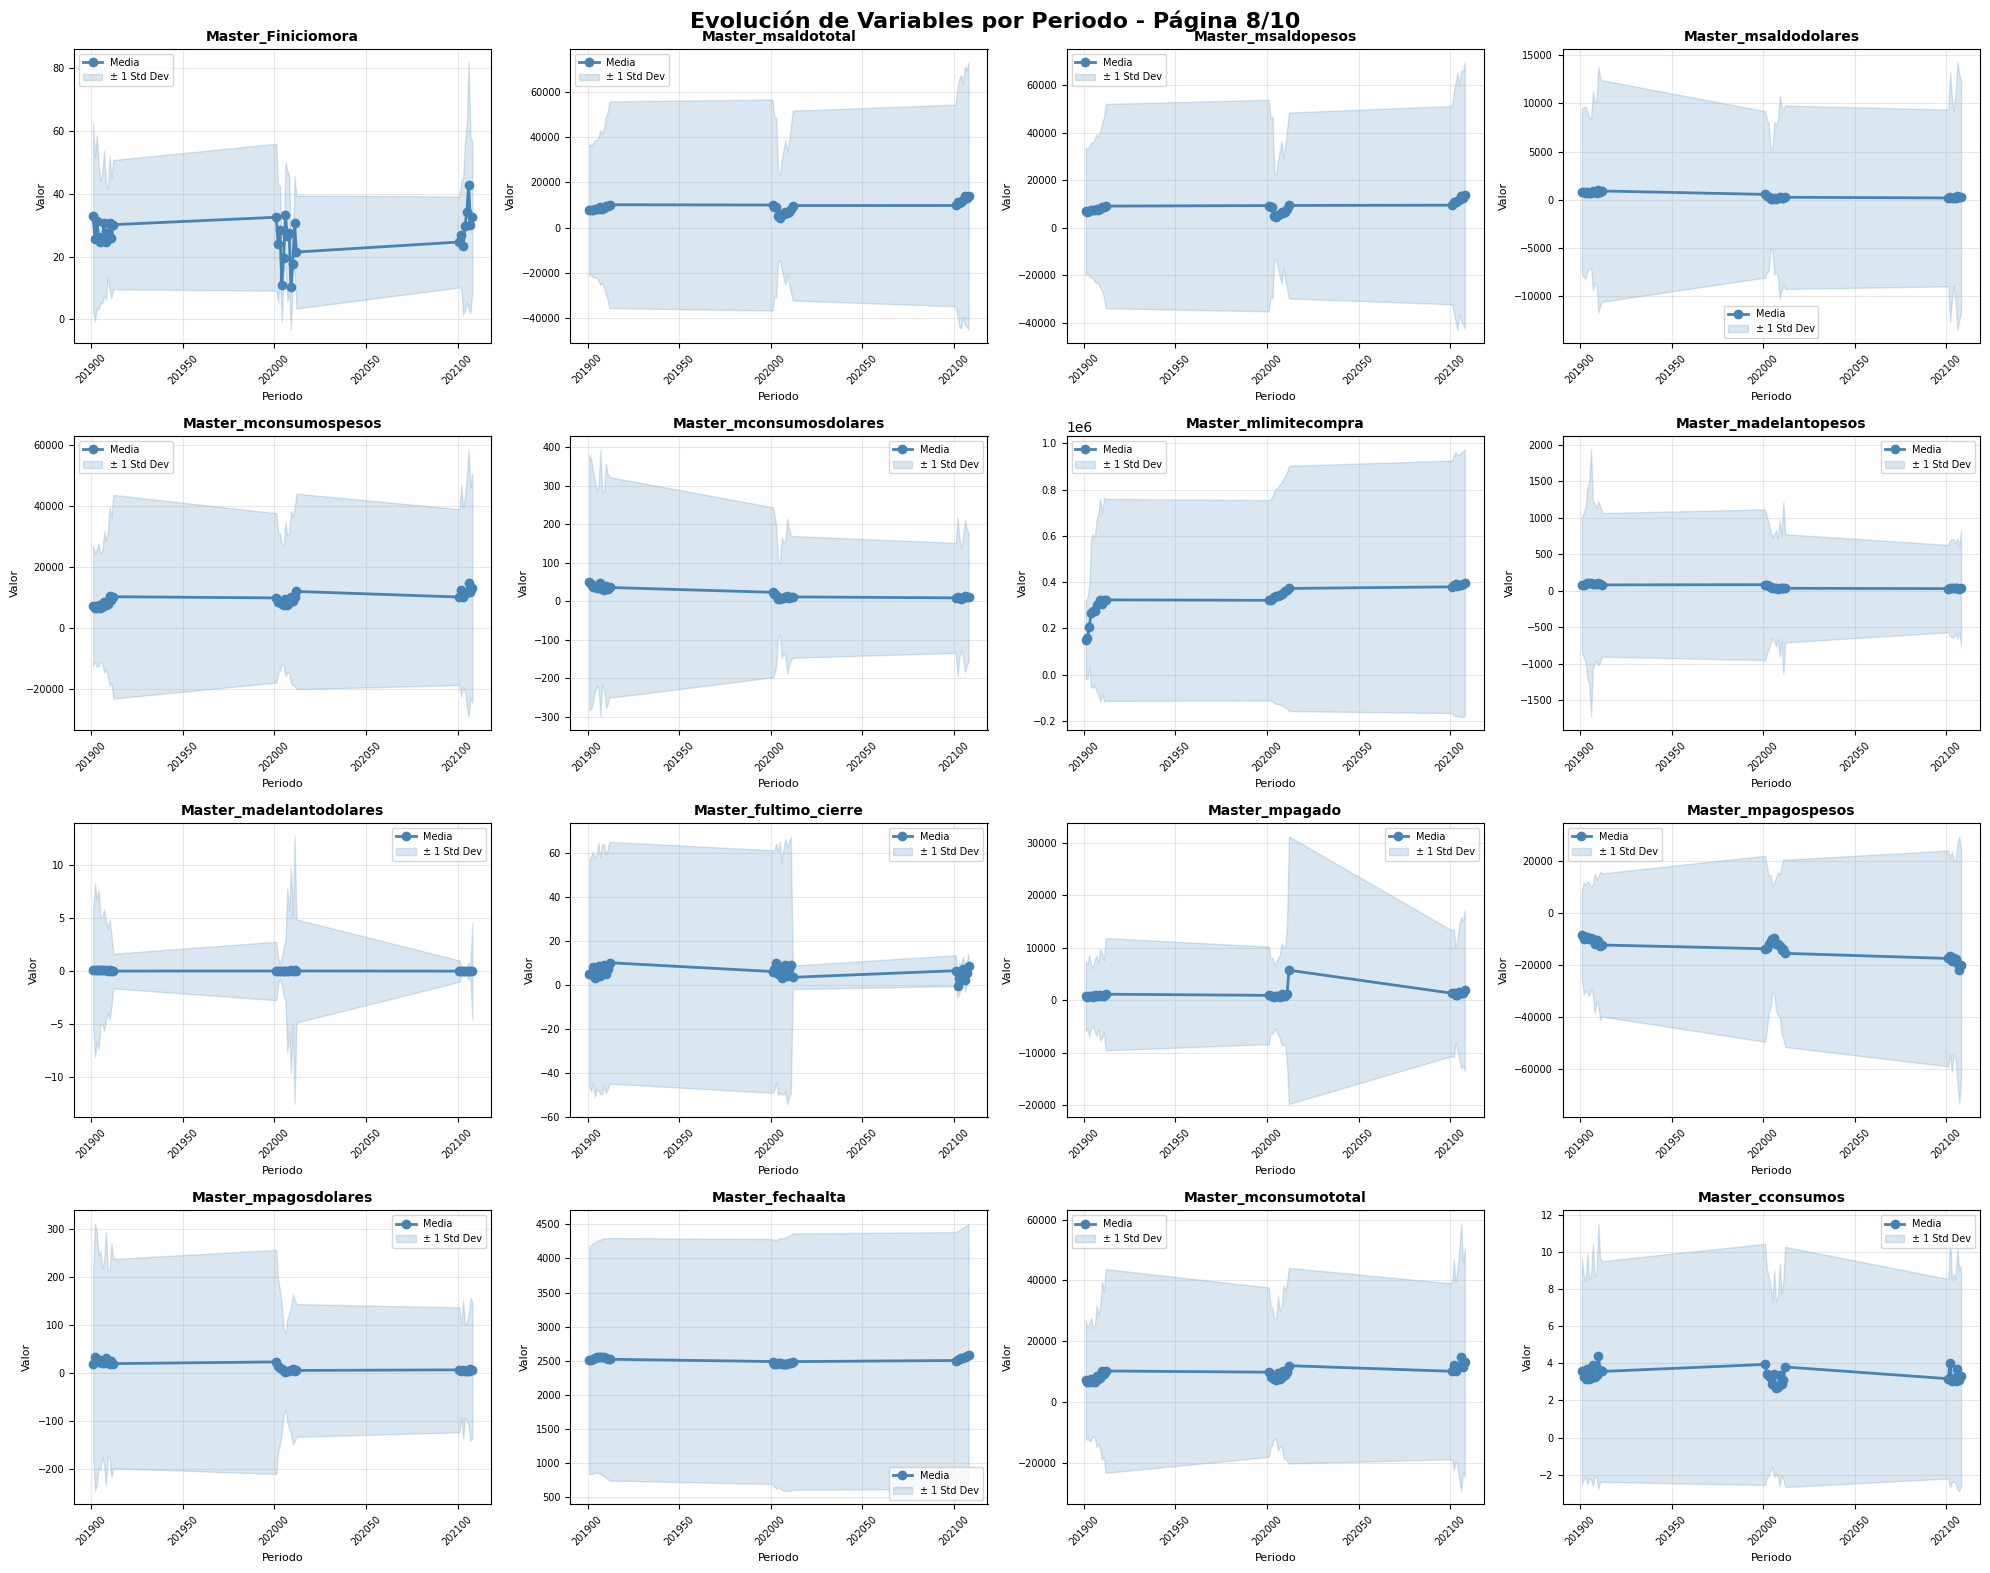

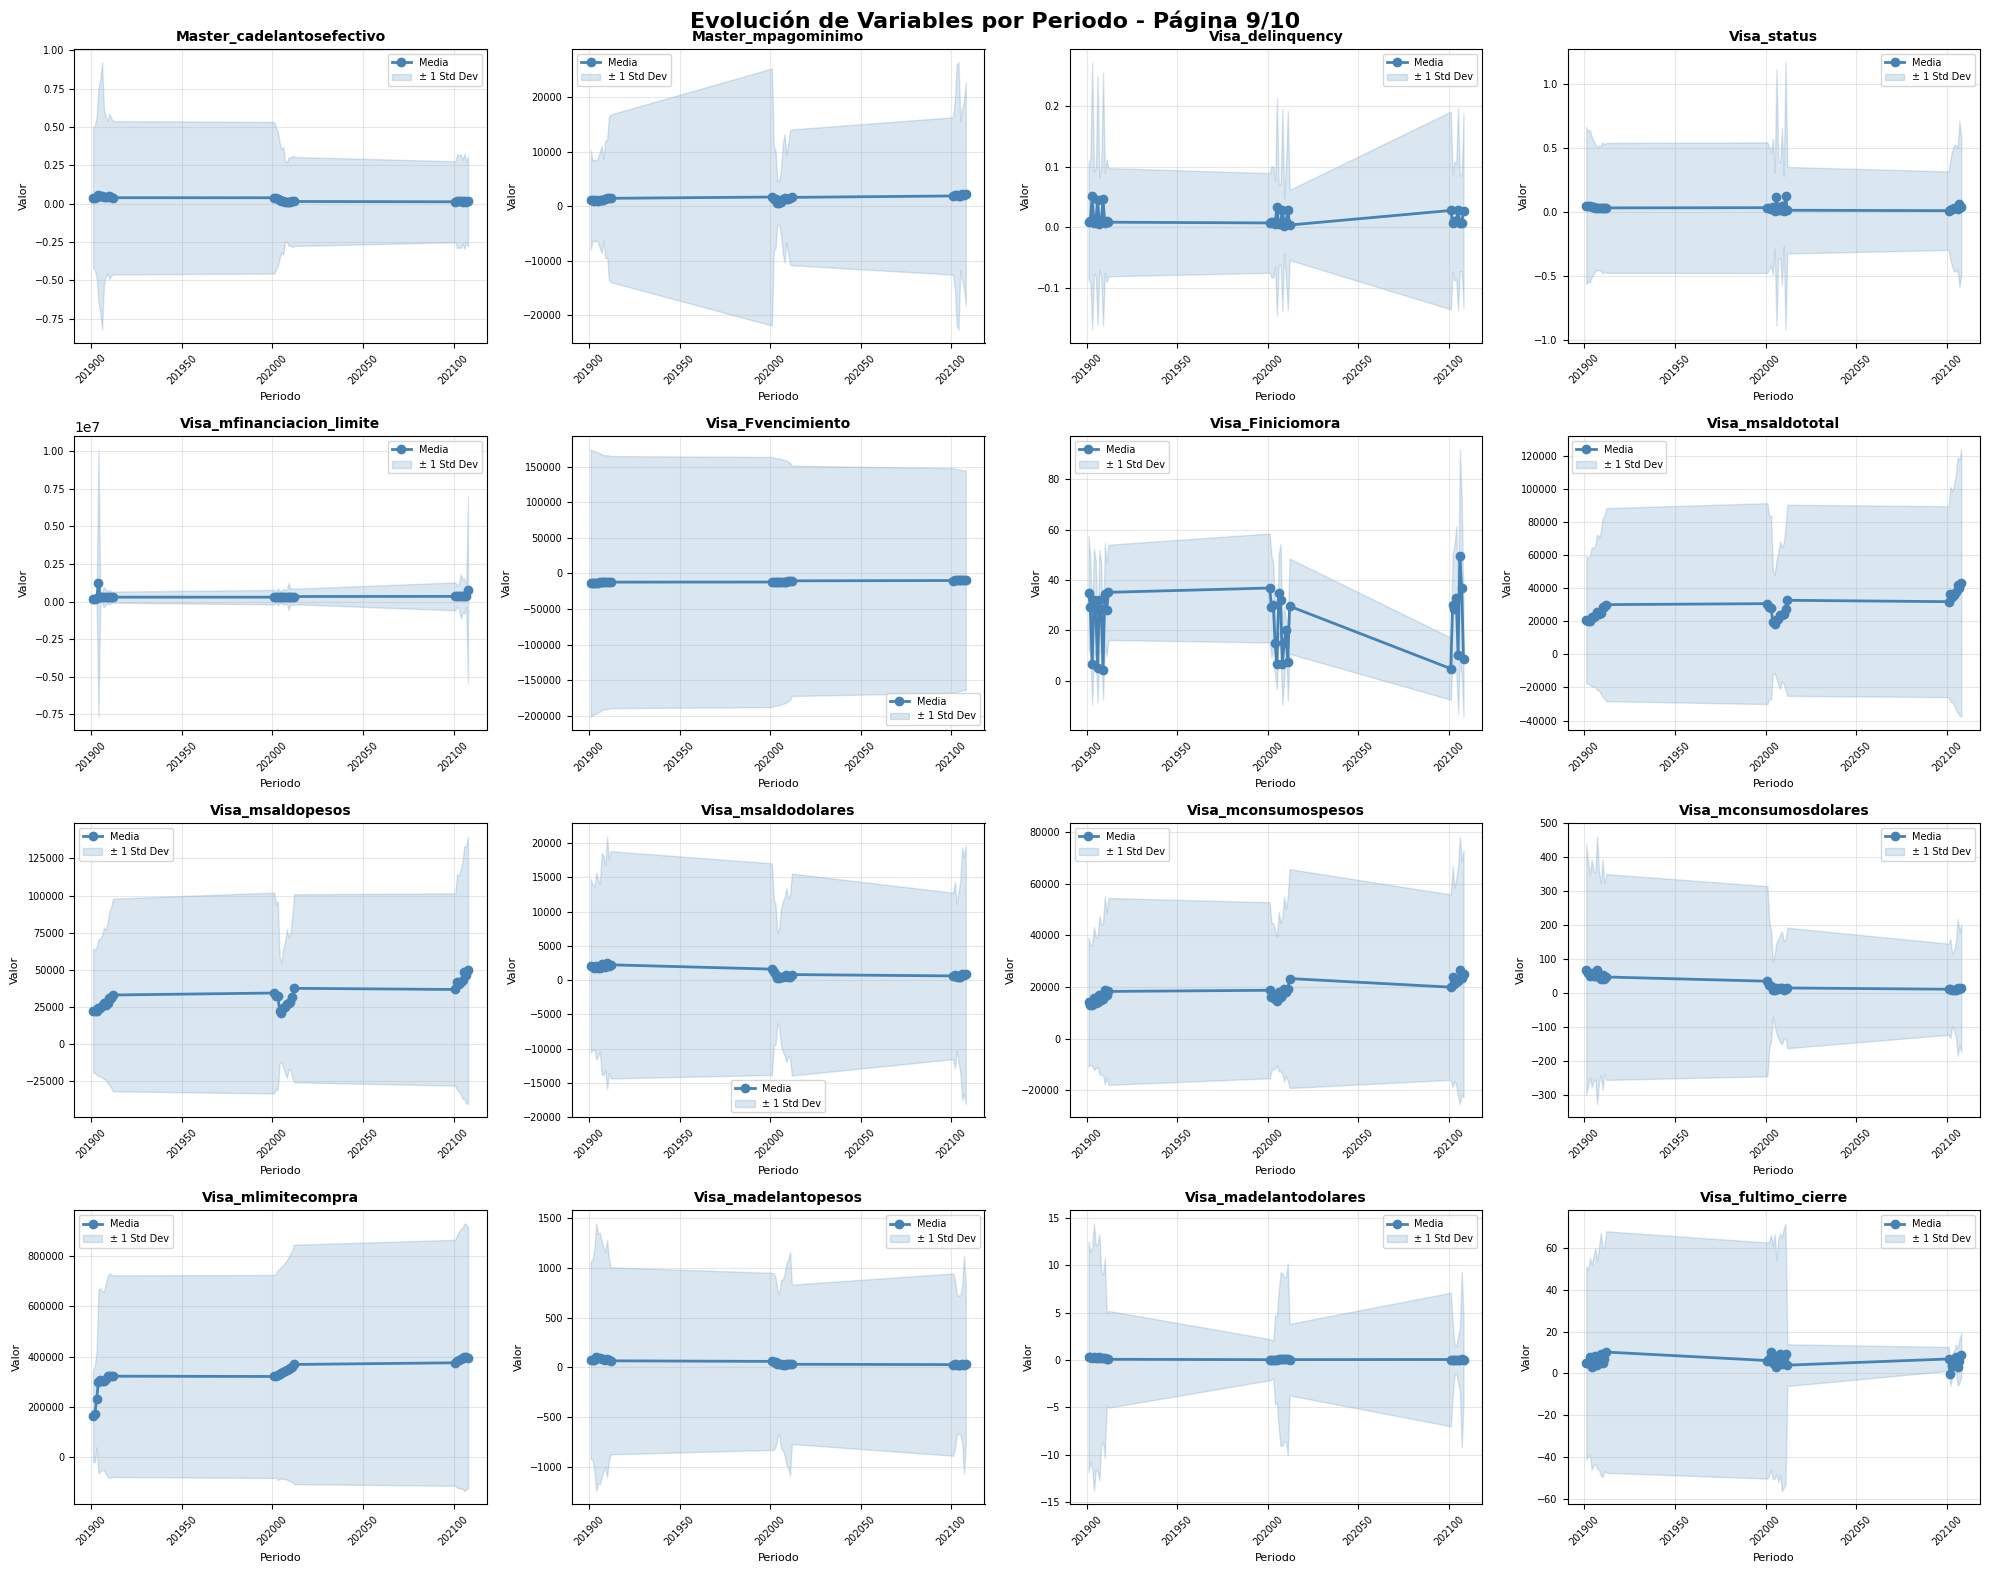

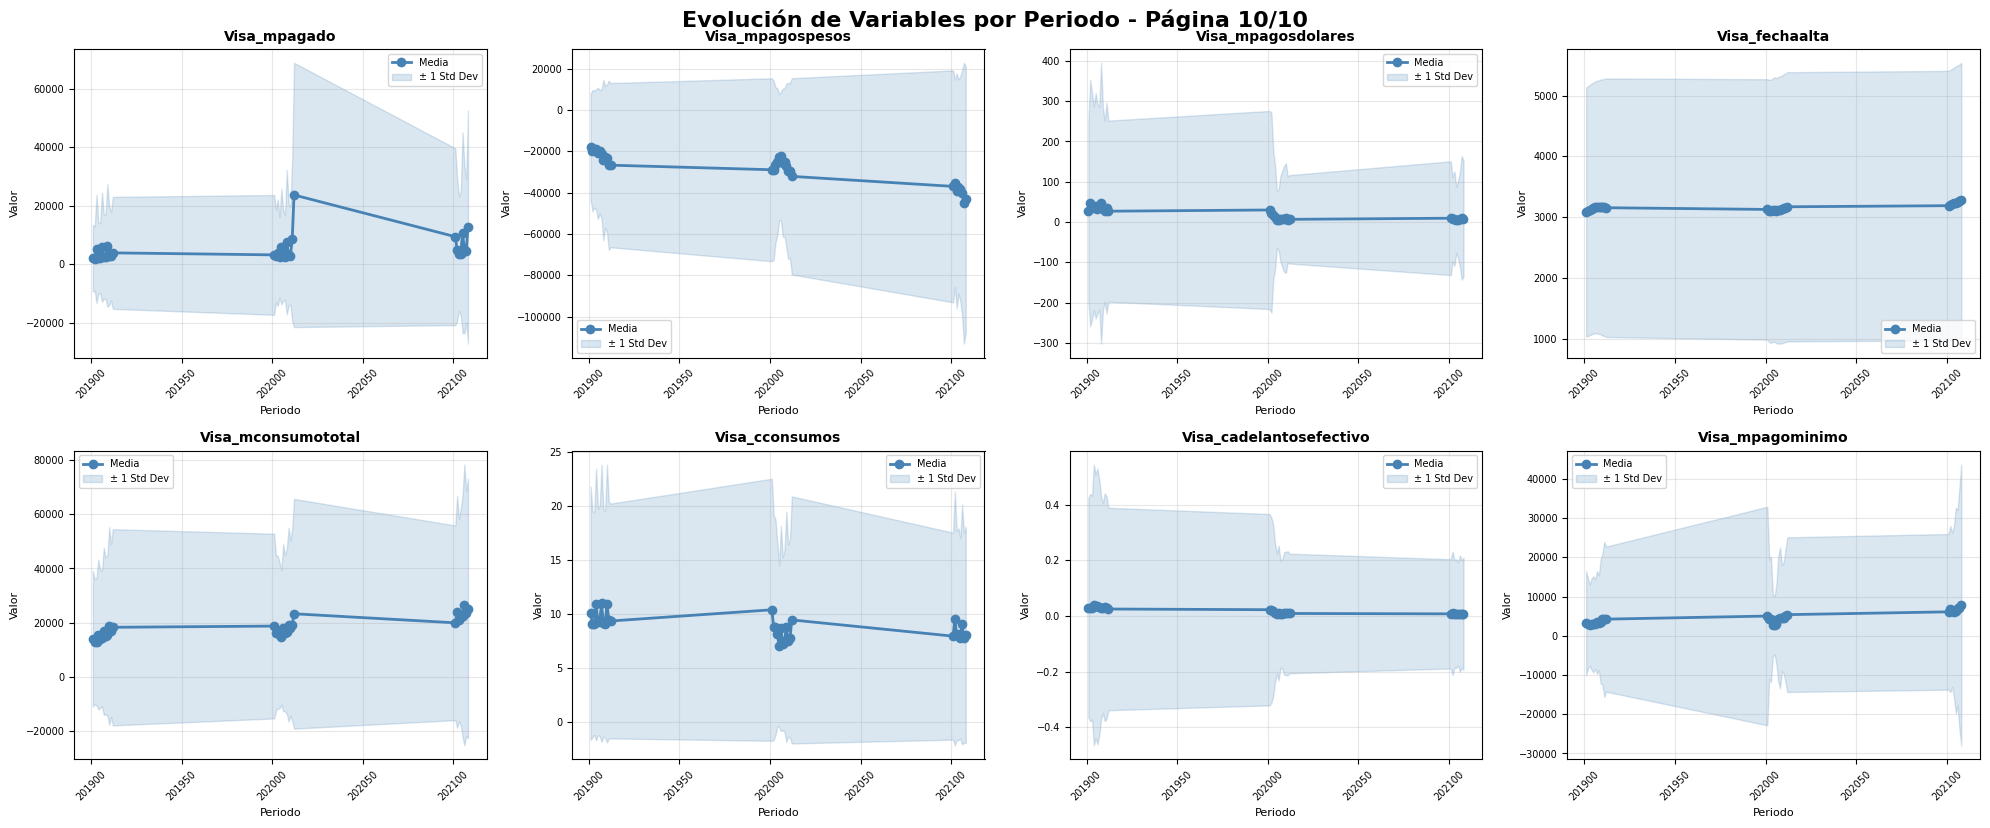

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ============================================
# CARGAR DATOS
# ============================================

periodo_col = 'foto_mes'
cliente_col = 'numero_de_cliente'

# Identificar columnas numéricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
columnas_numericas = [c for c in columnas_numericas if c not in [periodo_col, cliente_col]]

print(f"Total de variables numéricas: {len(columnas_numericas)}")
print(f"Periodos: {sorted(df[periodo_col].unique())}")

# ============================================
# CALCULAR ESTADÍSTICOS POR PERIODO
# ============================================
# Agrupa por periodo y calcula estadísticos
stats_por_periodo = df.groupby(periodo_col)[columnas_numericas].agg(['mean', 'median', 'std'])

# ============================================
# CREAR GRÁFICOS
# ============================================
# Define cuántas variables por página (ajusta según necesites)
vars_por_pagina = 16

# Calcular número de páginas necesarias
num_paginas = int(np.ceil(len(columnas_numericas) / vars_por_pagina))

print(f"\nGenerando {num_paginas} páginas de gráficos...")

for pagina in range(num_paginas):
    # Variables para esta página
    inicio = pagina * vars_por_pagina
    fin = min(inicio + vars_por_pagina, len(columnas_numericas))
    vars_pagina = columnas_numericas[inicio:fin]
    
    # Crear figura
    filas = 4
    cols = 4
    fig, axes = plt.subplots(filas, cols, figsize=(20, 16))
    fig.suptitle(f'Evolución de Variables por Periodo - Página {pagina + 1}/{num_paginas}', 
                 fontsize=16, fontweight='bold')
    
    # Aplanar axes para iterar fácilmente
    axes_flat = axes.flatten()
    
    for idx, var in enumerate(vars_pagina):
        ax = axes_flat[idx]
        
        # Obtener datos de media y std
        medias = stats_por_periodo[var]['mean']
        stds = stats_por_periodo[var]['std']
        periodos = medias.index
        
        # Graficar media
        ax.plot(periodos, medias, marker='o', linewidth=2, label='Media', color='steelblue')
        
        # Agregar banda de desviación estándar
        ax.fill_between(periodos, 
                        medias - stds, 
                        medias + stds, 
                        alpha=0.2, 
                        color='steelblue',
                        label='± 1 Std Dev')
        
        # Formato
        ax.set_title(var, fontsize=10, fontweight='bold')
        ax.set_xlabel('Periodo', fontsize=8)
        ax.set_ylabel('Valor', fontsize=8)
        ax.tick_params(labelsize=7)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=7, loc='best')
        
        # Rotar etiquetas del eje x si hay muchos periodos
        if len(periodos) > 5:
            ax.tick_params(axis='x', rotation=45)
    
    # Ocultar ejes sobrantes
    for idx in range(len(vars_pagina), len(axes_flat)):
        axes_flat[idx].set_visible(False)
    
    plt.tight_layout()
    plt.savefig(f'drift_visual_pagina_{pagina + 1}.png', dpi=150, bbox_inches='tight')
    print(f"  ✅ Página {pagina + 1} guardada")

print(f"\n🎉 Completado! {num_paginas} archivos PNG generados.")

# ============================================
# RESUMEN DE CAMBIOS
# ============================================
print("\n" + "="*70)
print("ANÁLISIS DE CAMBIOS ENTRE PRIMER Y ÚLTIMO PERIODO")
print("="*70)

primer_periodo = df[periodo_col].min()
ultimo_periodo = df[periodo_col].max()

cambios = []
for var in columnas_numericas:
    media_inicial = stats_por_periodo[var]['mean'].iloc[0]
    media_final = stats_por_periodo[var]['mean'].iloc[-1]
    
    if media_inicial != 0:
        cambio_pct = ((media_final - media_inicial) / abs(media_inicial)) * 100
    else:
        cambio_pct = 0
    
    cambios.append({
        'Variable': var,
        'Media_Inicial': media_inicial,
        'Media_Final': media_final,
        'Cambio_%': cambio_pct
    })

df_cambios = pd.DataFrame(cambios).sort_values('Cambio_%', key=abs, ascending=False)

print(f"\n🔴 TOP 10 VARIABLES CON MAYOR CAMBIO:")
print(df_cambios.head(10).to_string(index=False))

print(f"\n🔵 TOP 10 VARIABLES MÁS ESTABLES:")
print(df_cambios.tail(10).to_string(index=False))

# Exportar resumen
df_cambios.to_csv('resumen_cambios.csv', index=False)
print("\n💾 Resumen exportado a 'resumen_cambios.csv'")